In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/cust_seg.csv")
df

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


Preprocesamiento de Datos

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Seleccionar solo las columnas relevantes
features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']
X = df[features]

# Normalizar las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64


Aplicamos KMeans para la Segmentación de Clientes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

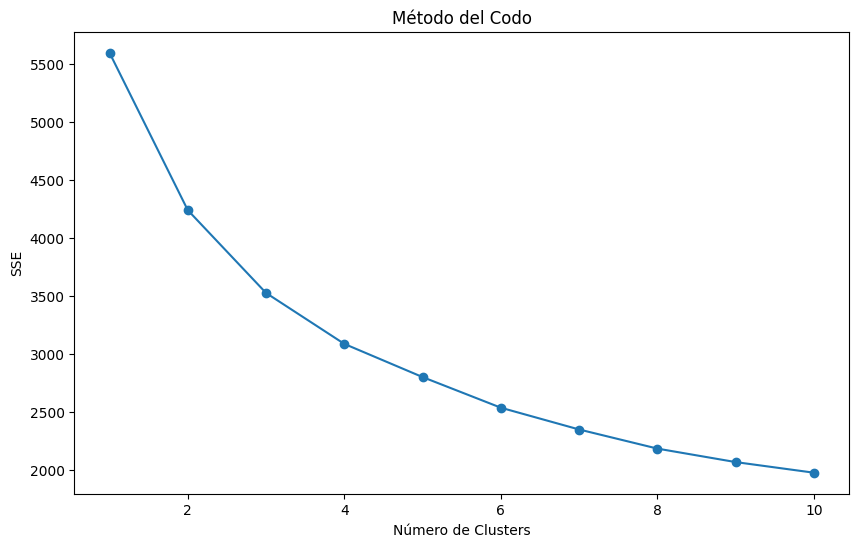

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Encontrar el número óptimo de clusters usando el método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()


Aplicamos KMeans con el Número Óptimo de Clusters

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Explorar los Segmentos de Clientes

         Unnamed: 0  Customer Id        Age       Edu  Years Employed  \
Cluster                                                                 
0        419.408537   420.408537  31.597561  1.884146        3.859756   
1        441.550898   442.550898  32.239521  1.640719        5.943114   
2        440.218750   441.218750  43.125000  2.343750       17.187500   
3        413.382353   414.382353  41.600000  1.611765       15.905882   

             Income  Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Cluster                                                                 
0         31.256098   1.573884    2.811689   0.975610        14.056707  
1         30.928144   0.667395    1.554440   0.000000         7.590120  
2        133.062500   7.995750   12.884469   0.593750        19.612500  
3         71.805882   2.062382    4.400788   0.023529        10.084706  


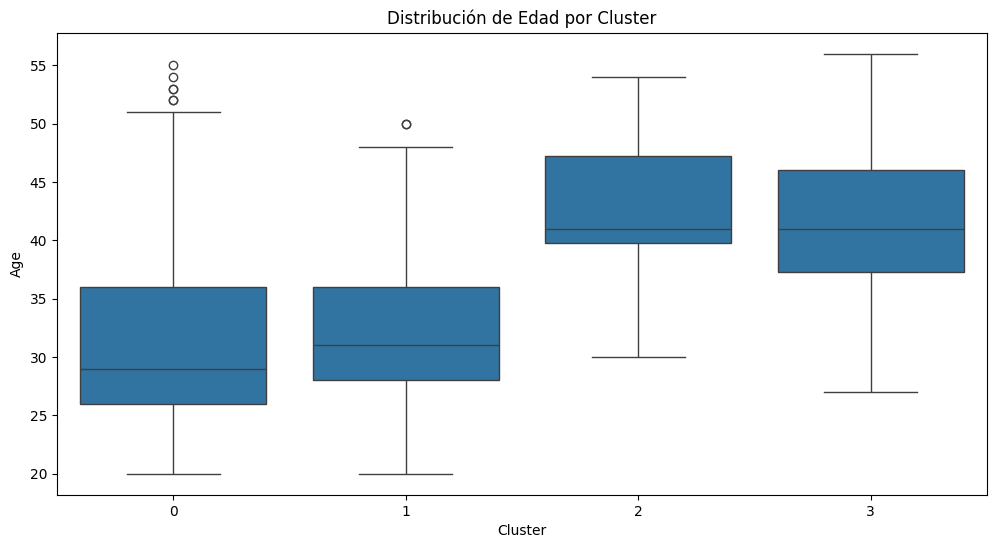

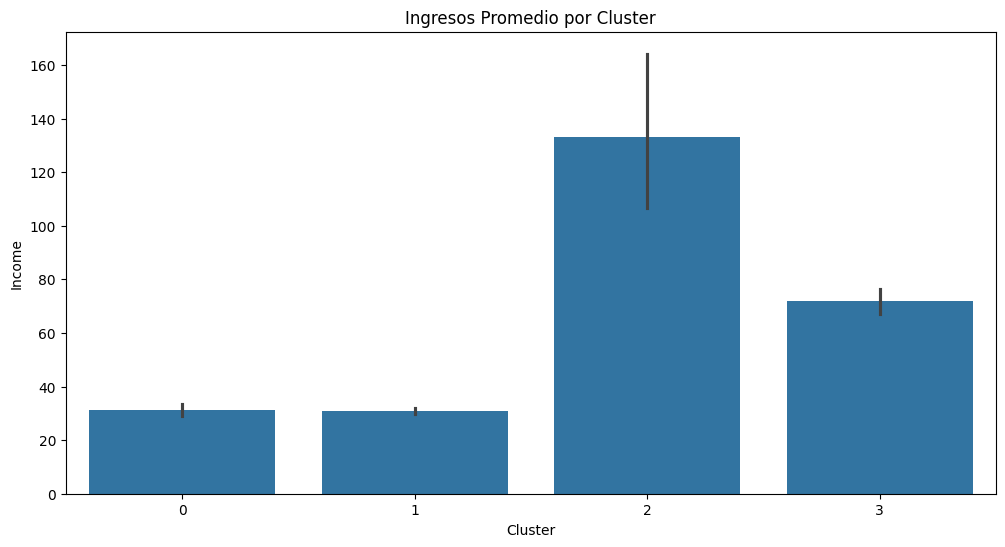

In [ ]:
# Resumen de los segmentos
segment_summary = df.groupby('Cluster').mean()
print(segment_summary)

# Crear visualizaciones para explorar las tendencias en los grupos
import seaborn as sns

# Visualización 1: Distribución de edad por cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Distribución de Edad por Cluster')
plt.show()

# Visualización 2: Ingresos promedio por cluster
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Income', data=df)
plt.title('Ingresos Promedio por Cluster')
plt.show()


Conclusión


Segmentación de Clientes: Utilizamos KMeans para crear segmentos de clientes basados en las características proporcionadas.


Exploración de Segmentos: Analizamos las tendencias dentro de los segmentos utilizando visualizaciones.

# SEGUNDA PARTE


Agrupación Jerárquica

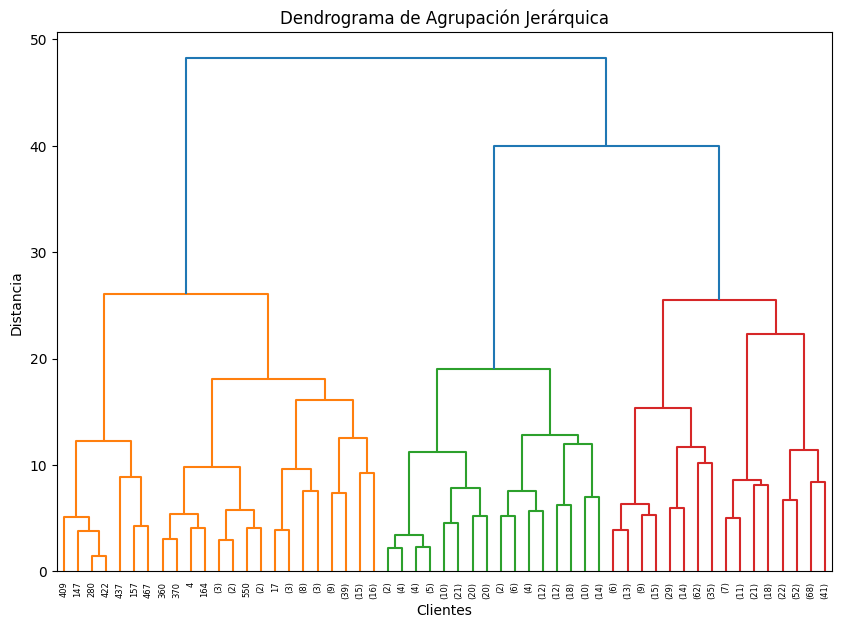

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Calcular el enlace jerárquico
Z = linkage(X_scaled, method='ward')

# Dendrograma para encontrar el número óptimo de clusters
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrograma de Agrupación Jerárquica')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

# Aplicar la agrupación jerárquica con el número óptimo de clusters (por ejemplo, 4)
df['Cluster_Hierarchical'] = fcluster(Z, t=4, criterion='maxclust')

Aplicarmos DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# los clusters encontrados por DBSCAN
n_clusters_dbscan = len(set(df['Cluster_DBSCAN'])) - (1 if -1 in df['Cluster_DBSCAN'] else 0)
print(f'Número de clusters encontrados por DBSCAN: {n_clusters_dbscan}')


Número de clusters encontrados por DBSCAN: 9


Comparacion los Algoritmos de Agrupamiento

In [ ]:
from sklearn.metrics import silhouette_score

# Silueta para KMeans
silhouette_kmeans = silhouette_score(X_scaled, df['Cluster'])
print(f'Silueta para KMeans: {silhouette_kmeans}')

# Silueta para Agrupación Jerárquica
silhouette_hierarchical = silhouette_score(X_scaled, df['Cluster_Hierarchical'])
print(f'Silueta para Agrupación Jerárquica: {silhouette_hierarchical}')

# Silueta para DBSCAN (considerando que DBSCAN puede encontrar ruido)
labels_dbscan = df['Cluster_DBSCAN']
labels_dbscan = labels_dbscan[labels_dbscan != -1]
X_scaled_dbscan = X_scaled[df['Cluster_DBSCAN'] != -1]
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled_dbscan, labels_dbscan)
    print(f'Silueta para DBSCAN: {silhouette_dbscan}')
else:
    silhouette_dbscan = -1  # No tiene sentido calcular la silueta si hay menos de 2 clusters válidos
    print('DBSCAN encontró menos de 2 clusters válidos.')


Silueta para KMeans: 0.2483377629854806
Silueta para Agrupación Jerárquica: 0.26834902542460964
Silueta para DBSCAN: 0.14169860713369156


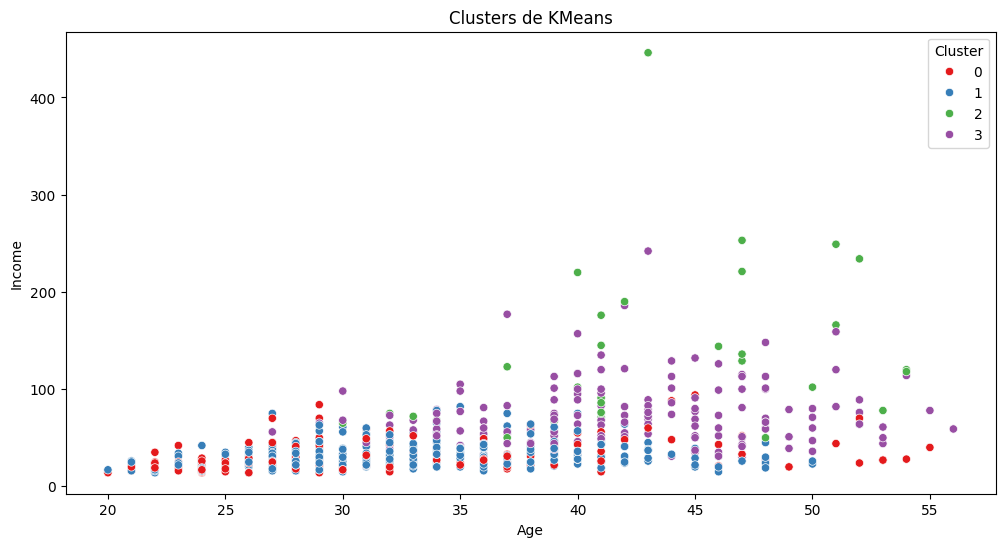

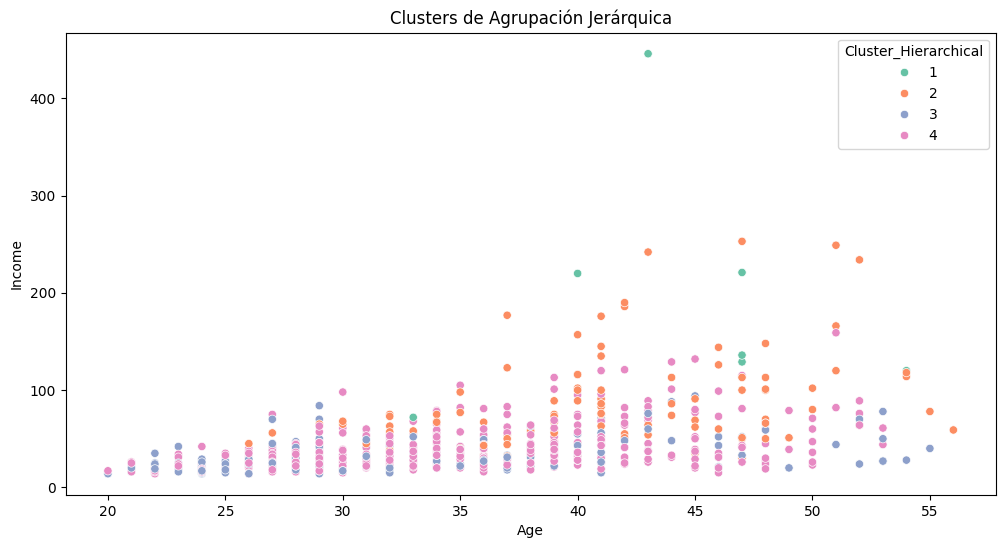

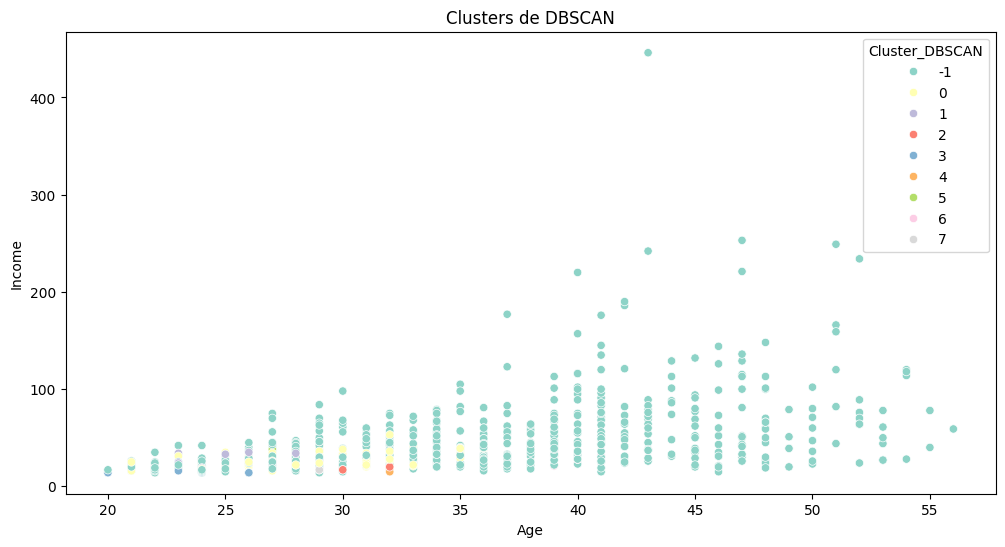

In [ ]:
import seaborn as sns

# Visualización de los clusters de KMeans
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters de KMeans')
plt.show()

# Visualización de los clusters de Agrupación Jerárquica
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Income', hue='Cluster_Hierarchical', data=df, palette='Set2')
plt.title('Clusters de Agrupación Jerárquica')
plt.show()

# Visualización de los clusters de DBSCAN
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Income', hue='Cluster_DBSCAN', data=df, palette='Set3')
plt.title('Clusters de DBSCAN')
plt.show()


¿Qué Algoritmo de Agrupación en Clústeres es Mejor?


Para determinar cuál es el mejor algoritmo:



KMeans: Bueno para clusters de forma esférica y tamaño similar. Utiliza la puntuación de la silueta para evaluar la calidad de los clusters.


Agrupación Jerárquica: Útil para entender la estructura jerárquica de los datos. Evalúa la calidad de los clusters con la silueta.


DBSCAN: Excelente para clusters de forma arbitraria y detección de ruido. Evalúa la calidad de los clusters con la silueta, pero ten en cuenta que puede no encontrar suficientes clusters válidos en todos los casos.

